# Tailorit - 1 Feature Clustering

### Imports and jupyter settings

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.visualization import *

### Load data

In [3]:
data = tailor.load_data()

### Rank features by their inter-feature variance

In [4]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season', 'month']
ranking.rank_features(data, distance.absolute, feats, 'article_count')

Abteilung    44.763694
month        12.649368
brand        10.133785
WHG           9.963491
season        7.670043
WUG           5.070465
color         2.246568
dtype: float64

A high score indicates feature characteristics are far apart, and thus better for clustering.

### Select a feature to cluster by

In [5]:
feat = 'color'
target_value = 'norm_revenue'

### Run the Clustering Algorithm

In [6]:
df = build_clusters(data, feat, distance.absolute, target_value)
cluster_characteristics(df, feat)

cluster
0     mittelbraun, mittelgrau, mittelblau, pink, tür...
1               weiss / blau, hellgrün, weiss / schwarz
39                                            ockergelb
Name: color, dtype: object

### Plot the article-count curves before and after the clustering

Number Characteristics:  40


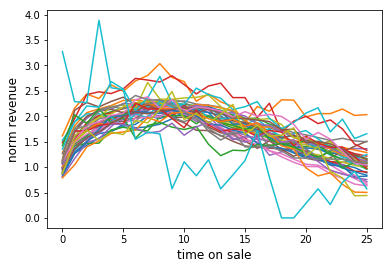

In [7]:
print("Number Characteristics: ", len(df[feat].unique()))
plot_feature_characteristics(df, feat, target_value, legend=False);

Number of Clusters:  3


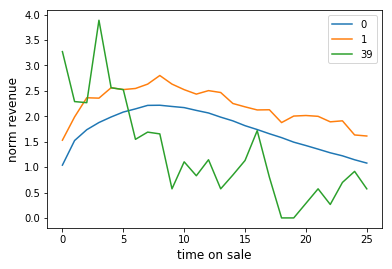

In [8]:
print("Number of Clusters: ", len(df['cluster'].unique()))
plot_feature_characteristics(df, 'cluster', target_value);

### Plot characteristics that are included in a specific Cluster

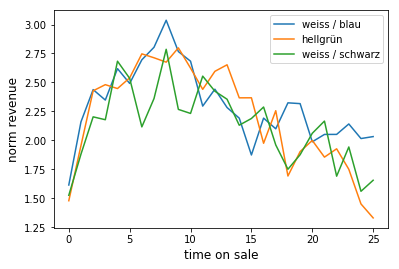

In [9]:
plot_cluster_characteristics(df, 1, feat, target_value, legend=True);

### Plot all articles that are included in a Cluster

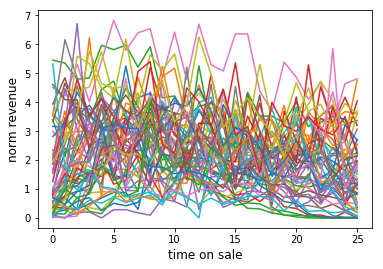

In [10]:
plot_cluster_articles(df, 1, target_value, legend=False);